# **Proyecto 3 Aprendizaje no supervisado**
Integrantes:
Jose Julian Camacho Hernandez\
Leonardo Guillén Fernandez\
Joshua Guzmán Quesada

## **Feature Engineering**

In [ ]:
# Librerías necesarias para el proceso de feature engineering
# de las imágenes
import os
from PIL import Image

# Script para procesar todas la imágenes del proyecto

# Se lee el directorio donde esta las carpetas que contienen
# las imágenes de los diferentes tipos de plantas tanto sanas
# como enfermas

categorias = []  # Lista para almacenar las categorías
directorio = "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset"  # Toma el directorio actual
folders = os.listdir(directorio)  # Lista las carpetas
extension = ".JPG" # Extensión aprobada para las imágenes
target_size = (100, 100) # Dimensión a recortar la imagen

# Itera sobre el folder para obtener las categrías
for cat in folders:
    categorias.append(cat)
categorias = categorias   # Elimina el script de python
print(categorias)

# Cuenta la cantidad de imágenes en cada una de las carpetas
for cat in categorias:
    category_folder = os.listdir(directorio + "\\" + cat)
    count = 0 # Se resetea el contador
    for image in category_folder:
        # Se toma la extensión del archivo
        image_dir = os.path.splitext(directorio + "\\" + cat+ "\\" + image)
        # Si la extensión del archivo no es JPG
        if image_dir[1] != extension:
            os.remove(directorio + "\\" + cat+ "\\" + image) # Se elimina
        # Aquellas que no son eliminadas se recortan a un tamaño de 100x100 pixeles
        else:
            image_abrir = Image.open(directorio + "\\" + cat+ "\\" + image)
            # Se toman la dimensiones de las imágenes para cortarlas
            width, height = image_abrir.size
            left = (width - target_size[0]) // 2
            upper = (height - target_size[1]) // 2
            right = left + target_size[0]
            lower = upper + target_size[1]

            # Se recorta la imagen con las indicaciones antes
            nueva_imagen = image_abrir.crop((left, upper, right, lower))
            # Se elimina la imagen de dimensión 256x256
            os.remove(directorio + "\\" + cat+ "\\" + image)
            #carpeta_destino = os.path.join(directorio, cat, nueva_imagen)
            #print(cat)
            nueva_imagen.save(directorio + "\\" + cat+ "\\" + image)

        count+=1

    print(cat, count)  # Se imprime la categoría y la cantidad asociada

## **1- Hipotésis I**

En ausencia de datos etiquetados, es posible entrenar un autoencoder reconstruyendo datos sin labels, haciendo transfer learning con el subconjunto pequeño que si tiene labels, y obtener mejores resultados que con solo usar el mismo subconjunto pequeñoo con labels directo para entrenar un clasificador.

### **1.1-Ejecución 1**

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf

In [ ]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Verificar si la GPU está disponible
if tf.test.is_gpu_available():
    # Configurar el dispositivo para utilizar la GPU
    device = tf.device('/GPU:0')
else:
    # Si la GPU no está disponible, utiliza la CPU
    device = tf.device('/CPU:0')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Tamaño de las imágenes: (1140, 256, 256, 3)
Tamaño de las etiquetas: (1140,)


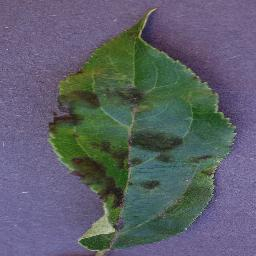

In [ ]:
with device:
    # Ruta a la carpeta del conjunto de datos en Google Drive
    data_folders =  ["/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Apple_scab",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Cedar_apple_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Blueberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Cercospora_leaf_spot Gray_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Common_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Northern_Leaf_Blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Esca_(Black_Measles)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Orange___Haunglongbing_(Citrus_greening)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Raspberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Soybean___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Squash___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___Leaf_scorch",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Leaf_Mold",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Septoria_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Spider_mites Two-spotted_spider_mite",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Target_Spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_mosaic_virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___healthy"]

    # Definir las etiquetas correspondientes
    labels = {
        "Apple___Apple_scab": 1,
        "Apple___Black_rot": 1,
        "Apple___Cedar_apple_rust": 1,
        "Apple___healthy": 0,
        "Blueberry___healthy": 0,
        "Cherry___Powdery_mildew": 1,
        "Cherry___healthy": 0,
        "Corn___Cercospora_leaf_spot Gray_leaf_spot":1,
        "Corn___Common_rust":1,
        "Corn___Northern_Leaf_Blight":1,
        "Corn___healthy":0,
        "Grape___Black_rot":1,
        "Grape___Esca_(Black_Measles)":1,
        "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)":1,
        "Grape___healthy":0,
        "Orange___Haunglongbing_(Citrus_greening)":1,
        "Peach___Bacterial_spot":1,
        "Peach___healthy":0,
        "Pepper,_bell___Bacterial_spot":1,
        "Pepper,_bell___healthy":0,
        "Potato___Early_blight":1,
        "Potato___Late_blight":1,
        "Potato___healthy":0,
        "Raspberry___healthy":0,
        "Soybean___healthy":0,
        "Squash___Powdery_mildew":1,
        "Strawberry___Leaf_scorch":1,
        "Strawberry___healthy":0,
        "Tomato___Bacterial_spot":1,
        "Tomato___Early_blight":1,
        "Tomato___Late_blight":1,
        "Tomato___Leaf_Mold":1,
        "Tomato___Septoria_leaf_spot":1,
        "Tomato___Spider_mites Two-spotted_spider_mite":1,
        "Tomato___Target_Spot":1,
        "Tomato___Tomato_Yellow_Leaf_Curl_Virus":1,
        "Tomato___Tomato_mosaic_virus":1,
        "Tomato___healthy":0
    }

    # Listas para almacenar las imágenes y las etiquetas
    images = []
    label_list = []

    # Recorrer las carpetas y cargar las imágenes
    for folder in data_folders:
        label = labels.get(os.path.basename(folder), 0)  # Obtener la etiqueta correspondiente
        #print(folder)
        count = 0  # Variable de conteo
        for filename in os.listdir(folder):
            if count >= 30:  # Controlar el número de archivos leídos
              break
            if filename.endswith(".JPG"):
                #print(filename)
                image_path = os.path.join(folder, filename)
                image = cv2.imread(image_path)
                images.append(image)
                label_list.append(label)
            if filename.endswith(".jpg"):
                #print(filename)
                image_path = os.path.join(folder, filename)
                image = cv2.imread(image_path)
                images.append(image)
                label_list.append(label)
            count += 1  # Incrementar el conteo

    # Convertir las listas de imágenes y etiquetas a arreglos numpy
    images = np.array(images)
    labels = np.array(label_list)

    # Imprimir el tamaño de las imágenes y las etiquetas
    print("Tamaño de las imágenes:", images.shape)
    print("Tamaño de las etiquetas:", labels.shape)

    cv2_imshow(images[2])

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

with device:

    # Dividir los datos etiquetados en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    #print(X_train.shape)
    #print(X_test.shape)
    #print(y_train.shape)
    #print(y_test.shape)
    # Preprocesamiento y normalización de los datos de entrada (imágenes)
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Dividir el conjunto sin etiquetas para entrenar el autoencoder
    X_unlabeled, _, _, _ = train_test_split(images, labels, test_size=1, random_state=42)

del images
del labels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_auc_score, roc_curve, f1_score

def computeMetrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)        # Calcular la exactitud
    prec = precision_score(y_test, y_pred)      # Calcular la precisión
    rec = recall_score(y_test, y_pred)          # Calcular el recall
    f1 = f1_score(y_test, y_pred)               # Calcular F1 score
    auc = roc_auc_score(y_test, y_pred)         # Calcular el AUC
    # Desplegar métricas
    metrics = {"Accuracy":acc, "Precision":prec, "Recall":rec, "F1 Score":f1, "AUC":auc}
    df = pd.DataFrame(metrics, index = [0])
    display(df)
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Compute the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve and AUC')
    plt.legend(loc="lower right")
    plt.show()

#### **1.1.1- Clasificador A: Modelo sin autoencoder**

Epoch 1/10
15/15 [==============================] - 10s 45ms/step - loss: 0.6793 - accuracy: 0.6458
Epoch 2/10
15/15 [==============================] - 1s 51ms/step - loss: 0.5598 - accuracy: 0.7018
Epoch 3/10
15/15 [==============================] - 1s 55ms/step - loss: 0.5015 - accuracy: 0.7412
Epoch 4/10
15/15 [==============================] - 1s 58ms/step - loss: 0.4348 - accuracy: 0.8081
Epoch 5/10
15/15 [==============================] - 1s 57ms/step - loss: 0.4288 - accuracy: 0.8125
Epoch 6/10
15/15 [==============================] - 1s 49ms/step - loss: 0.3363 - accuracy: 0.8827
Epoch 7/10
15/15 [==============================] - 1s 38ms/step - loss: 0.3236 - accuracy: 0.8596
Epoch 8/10
15/15 [==============================] - 1s 36ms/step - loss: 0.3547 - accuracy: 0.8465
Epoch 9/10
15/15 [==============================] - 1s 37ms/step - loss: 0.2330 - accuracy: 0.9189
Epoch 10/10
8/8 [==============================] - 0s 23ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.811404,0.83125,0.892617,0.860841,0.775423


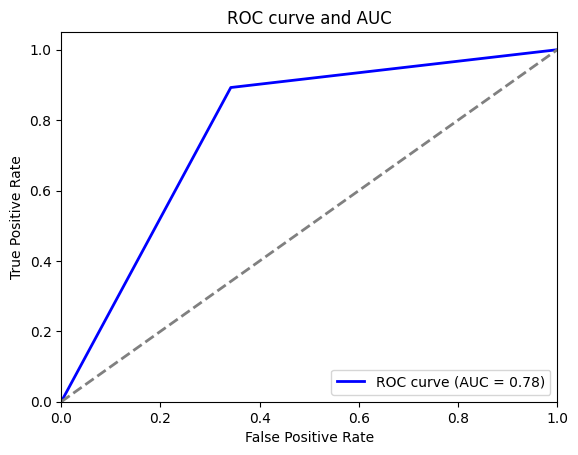

29/29 [==============================] - 0s 15ms/step
(228,)
(912,)


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.962719,0.957121,0.990491,0.97352,0.945424


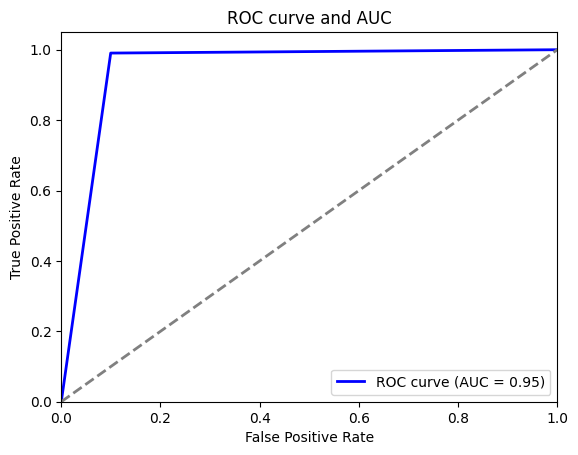

In [ ]:
with device:

    # Entrenar el modelo desde cero
    model_from_scratch = keras.Sequential([
        layers.Conv2D(32, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    model_from_scratch.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_from_scratch.fit(X_train, y_train, epochs=10, batch_size=64)
    y_pred_prob_from_scratch = model_from_scratch.predict(X_test)

    # Obtener las clases predichas
    y_pred_from_scratch = np.argmax(y_pred_prob_from_scratch, axis=1)
    computeMetrics(y_test, y_pred_from_scratch)

    # Para el conjunto de training
    y_pred_prob_from_scratch = model_from_scratch.predict(X_train)
    # Obtener las clases predichas
    y_pred_from_scratch = np.argmax(y_pred_prob_from_scratch, axis=1)
    print(y_test.shape)
    print(y_pred_from_scratch.shape)
    computeMetrics(y_train, y_pred_from_scratch)

    del model_from_scratch

In [ ]:
from tensorflow.keras import layers, models

with device:
        # Definir y entrenar el autoencoder
        autoencoder = models.Sequential([
            layers.Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
            layers.Conv2D(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(3, kernel_size=3, strides=2, activation='sigmoid', padding='same', name='decoded')
            ])

        autoencoder.compile(optimizer='adam', loss='mse')
        autoencoder.fit(X_unlabeled, X_unlabeled, epochs=3, batch_size=8)
        print("Forma convertida:", X_unlabeled.shape)
        print("Forma convertida:", X_unlabeled.shape)
        # Obtener la representación latente de las imágenes con el encoder del autoencoder
        encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
        X_train_encoded = encoder.predict(X_train)
        X_test_encoded = encoder.predict(X_test)


Epoch 1/3
143/143 [==============================] - 3s 9ms/step - loss: 16411.0527
Epoch 2/3
143/143 [==============================] - 1s 7ms/step - loss: 16396.6426
Epoch 3/3
143/143 [==============================] - 1s 7ms/step - loss: 16396.6406
Forma convertida: (1139, 256, 256, 3)
Forma convertida: (1139, 256, 256, 3)
8/8 [==============================] - 0s 28ms/step


#### **1.1.2- Clasificador B: Modelo con autoencoder con pesos congelados**

Epoch 1/10
57/57 [==============================] - 6s 47ms/step - loss: 0.0266
Epoch 2/10
57/57 [==============================] - 2s 39ms/step - loss: 0.0097
Epoch 3/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0066
Epoch 4/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0059
Epoch 5/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0056
Epoch 6/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0054
Epoch 7/10
57/57 [==============================] - 2s 38ms/step - loss: 0.0052
Epoch 8/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0050
Epoch 9/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0048
Epoch 10/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0047
Epoch 1/10
57/57 [==============================] - 2s 10ms/step - loss: 0.9392 - accuracy: 0.6765
Epoch 2/10
57/57 [==============================] - 1s 10ms/step - loss: 0.5310 - accuracy: 0.7357
E

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.802632,0.798851,0.932886,0.860681,0.744924


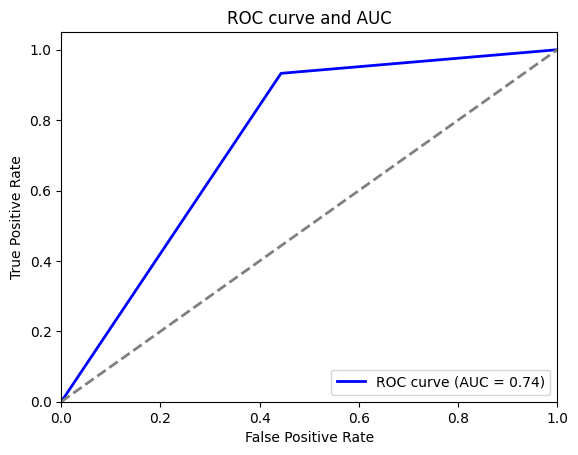

29/29 [==============================] - 1s 17ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.854167,0.837398,0.979398,0.902849,0.776176


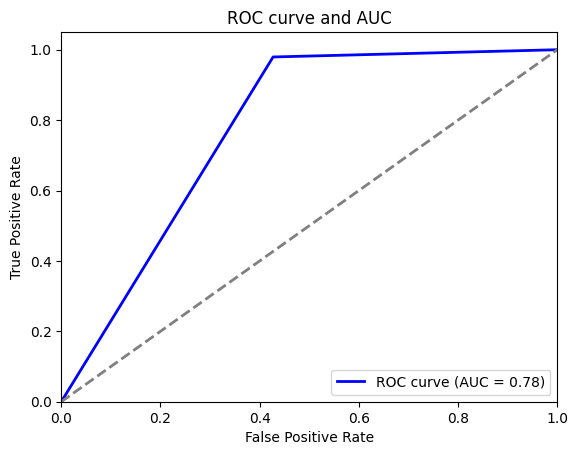

In [ ]:
# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)
encoder.trainable = False
encoder_output = encoder(encoder_input)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
computeMetrics(y_test, y_pred)

# Evaluar el modelo
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)
computeMetrics(y_train, y_pred)

del encoder_input
del encoder_output
del decoder_output
del autoencoder
del classifier
del model

#### **1.1.3- Calsificador C: Modelo con autoencoder sin pesos congelados**

Epoch 1/10
57/57 [==============================] - 8s 42ms/step - loss: 0.0267
Epoch 2/10
57/57 [==============================] - 2s 40ms/step - loss: 0.0088
Epoch 3/10
57/57 [==============================] - 2s 38ms/step - loss: 0.0067
Epoch 4/10
57/57 [==============================] - 2s 43ms/step - loss: 0.0061
Epoch 5/10
57/57 [==============================] - 3s 48ms/step - loss: 0.0057
Epoch 6/10
57/57 [==============================] - 2s 41ms/step - loss: 0.0055
Epoch 7/10
57/57 [==============================] - 2s 38ms/step - loss: 0.0052
Epoch 8/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0051
Epoch 9/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0050
Epoch 10/10
57/57 [==============================] - 2s 35ms/step - loss: 0.0049
Epoch 1/10
57/57 [==============================] - 2s 16ms/step - loss: 1.2477 - accuracy: 0.6349
Epoch 2/10
57/57 [==============================] - 1s 14ms/step - loss: 0.5174 - accuracy: 0.7160
E

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.741228,0.777778,0.845638,0.810289,0.694971


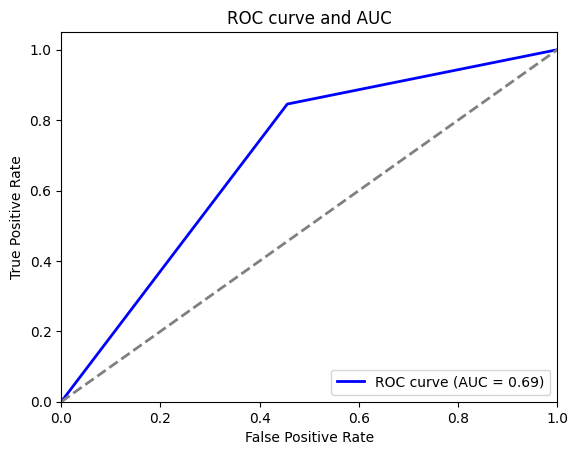

29/29 [==============================] - 1s 18ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.967105,0.965891,0.987322,0.976489,0.954515


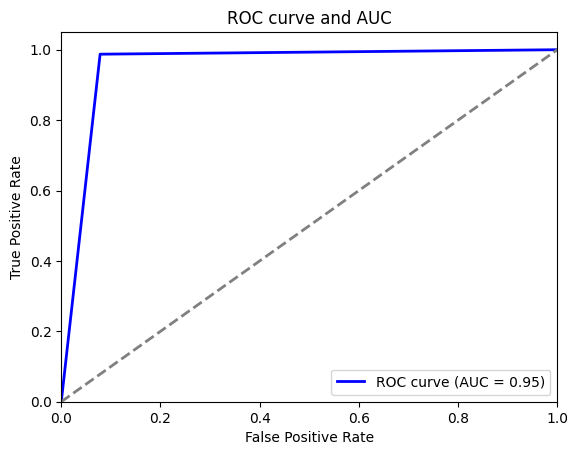

In [ ]:
# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
computeMetrics(y_test, y_pred)

#En este código, se ha eliminado la línea encoder.trainable = False
#para que los pesos del encoder no estén congelados y se actualicen
#durante el entrenamiento del clasificador.

# Evaluar el modelo
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)

computeMetrics(y_train, y_pred)


### **1.2- Ejecución 2**

#### **1.2.1- Clasificador D: Modelo sin autoencoder**

Epoch 1/10
15/15 [==============================] - 2s 39ms/step - loss: 0.7277 - accuracy: 0.6546
Epoch 2/10
15/15 [==============================] - 1s 36ms/step - loss: 0.6285 - accuracy: 0.6919
Epoch 3/10
15/15 [==============================] - 1s 53ms/step - loss: 0.6099 - accuracy: 0.6919
Epoch 4/10
15/15 [==============================] - 1s 58ms/step - loss: 0.5729 - accuracy: 0.6919
Epoch 5/10
15/15 [==============================] - 1s 57ms/step - loss: 0.5015 - accuracy: 0.7138
Epoch 6/10
15/15 [==============================] - 1s 61ms/step - loss: 0.4341 - accuracy: 0.7851
Epoch 7/10
15/15 [==============================] - 1s 44ms/step - loss: 0.3852 - accuracy: 0.8465
Epoch 8/10
15/15 [==============================] - 1s 37ms/step - loss: 0.3349 - accuracy: 0.8673
Epoch 9/10
15/15 [==============================] - 1s 36ms/step - loss: 0.3003 - accuracy: 0.8827
Epoch 10/10
8/8 [==============================] - 0s 14ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.837719,0.888889,0.85906,0.87372,0.828264


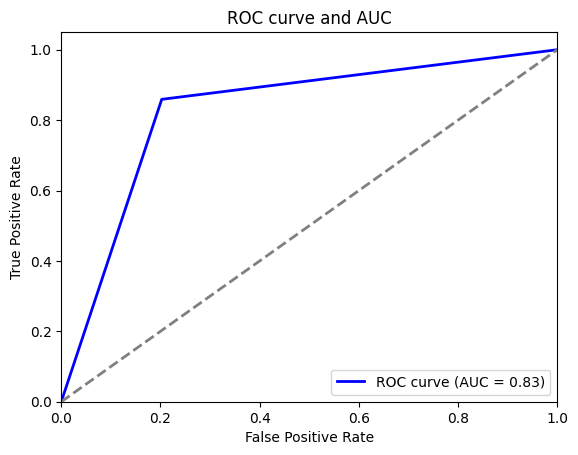

29/29 [==============================] - 0s 15ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.926535,0.976351,0.916006,0.945217,0.933092


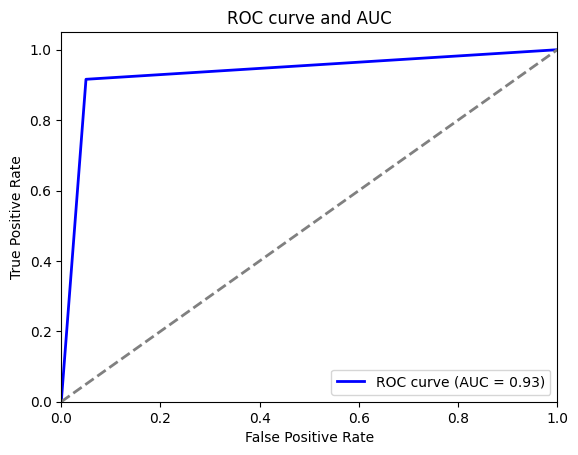

In [ ]:
with device:

    # Entrenar el modelo desde cero
    model_from_scratch = keras.Sequential([
        layers.Conv2D(32, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    model_from_scratch.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_from_scratch.fit(X_train, y_train, epochs=10, batch_size=64)
    y_pred_prob_from_scratch = model_from_scratch.predict(X_test)

    # Obtener las clases predichas
    y_pred_from_scratch = np.argmax(y_pred_prob_from_scratch, axis=1)
    computeMetrics(y_test, y_pred_from_scratch)

    # Para el conjunto de training
    y_pred_prob_from_scratch = model_from_scratch.predict(X_train)
    # Obtener las clases predichas
    y_pred_from_scratch = np.argmax(y_pred_prob_from_scratch, axis=1)
    computeMetrics(y_train, y_pred_from_scratch)

    del model_from_scratch

In [ ]:
from tensorflow.keras import layers, models

with device:
        # Definir y entrenar el autoencoder
        autoencoder = models.Sequential([
            layers.Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
            layers.Conv2D(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(3, kernel_size=3, strides=2, activation='sigmoid', padding='same', name='decoded')
            ])

        autoencoder.compile(optimizer='adam', loss='mse')
        autoencoder.fit(X_unlabeled, X_unlabeled, epochs=3, batch_size=8)
        print("Forma convertida:", X_unlabeled.shape)
        print("Forma convertida:", X_unlabeled.shape)
        # Obtener la representación latente de las imágenes con el encoder del autoencoder
        encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
        X_train_encoded = encoder.predict(X_train)
        X_test_encoded = encoder.predict(X_test)


Epoch 1/3
95/95 [==============================] - 3s 8ms/step - loss: 16420.9102
Epoch 2/3
95/95 [==============================] - 1s 7ms/step - loss: 16397.0391
Epoch 3/3
95/95 [==============================] - 1s 7ms/step - loss: 16396.8574
Forma convertida: (759, 256, 256, 3)
Forma convertida: (759, 256, 256, 3)
5/5 [==============================] - 0s 13ms/step


1.2 Trabajo a Binario

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Ruta a la carpeta del conjunto de datos en Google Drive
data_folders =  ["/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Apple_scab",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Cedar_apple_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Blueberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Cercospora_leaf_spot Gray_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Common_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Northern_Leaf_Blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Esca_(Black_Measles)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Orange___Haunglongbing_(Citrus_greening)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Raspberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Soybean___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Squash___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___Leaf_scorch",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Leaf_Mold",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Septoria_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Spider_mites Two-spotted_spider_mite",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Target_Spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_mosaic_virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___healthy"]

    # Definir las etiquetas correspondientes
labels = {
        "Apple___Apple_scab": 1,
        "Apple___Black_rot": 1,
        "Apple___Cedar_apple_rust": 1,
        "Apple___healthy": 0,
        "Blueberry___healthy": 0,
        "Cherry___Powdery_mildew": 1,
        "Cherry___healthy": 0,
        "Corn___Cercospora_leaf_spot Gray_leaf_spot":1,
        "Corn___Common_rust":1,
        "Corn___Northern_Leaf_Blight":1,
        "Corn___healthy":0,
        "Grape___Black_rot":1,
        "Grape___Esca_(Black_Measles)":1,
        "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)":1,
        "Grape___healthy":0,
        "Orange___Haunglongbing_(Citrus_greening)":1,
        "Peach___Bacterial_spot":1,
        "Peach___healthy":0,
        "Pepper,_bell___Bacterial_spot":1,
        "Pepper,_bell___healthy":0,
        "Potato___Early_blight":1,
        "Potato___Late_blight":1,
        "Potato___healthy":0,
        "Raspberry___healthy":0,
        "Soybean___healthy":0,
        "Squash___Powdery_mildew":1,
        "Strawberry___Leaf_scorch":1,
        "Strawberry___healthy":0,
        "Tomato___Bacterial_spot":1,
        "Tomato___Early_blight":1,
        "Tomato___Late_blight":1,
        "Tomato___Leaf_Mold":1,
        "Tomato___Septoria_leaf_spot":1,
        "Tomato___Spider_mites Two-spotted_spider_mite":1,
        "Tomato___Target_Spot":1,
        "Tomato___Tomato_Yellow_Leaf_Curl_Virus":1,
        "Tomato___Tomato_mosaic_virus":1,
        "Tomato___healthy":0
    }


# Listas para almacenar las imágenes y las etiquetas
images = []
label_list = []

# Recorrer las carpetas y cargar las imágenes
for folder in data_folders:
    label = labels.get(os.path.basename(folder), 0)  # Obtener la etiqueta correspondiente
    count = 0  # Variable de conteo
    for filename in os.listdir(folder):
        if count >= 30:  # Controlar el número de archivos leídos
            break
        if filename.lower().endswith((".jpg", ".JPG")):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path)
            images.append(image)
            label_list.append(label)
            count += 1

# Convertir las listas de imágenes y etiquetas a arreglos numpy
images = np.array(images)
labels = np.array(label_list)

# Preprocesamiento y normalización de los datos de entrada (imágenes)
images = images.astype('float32') / 255.0

# Dividir los datos etiquetados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(570, 256, 256, 3)
(570, 256, 256, 3)
(570,)
(570,)


#### **1.2.2- Clasificador E: Modelo con autoencoder con pesos congelados**

Epoch 1/10
36/36 [==============================] - 4s 66ms/step - loss: 0.0309
Epoch 2/10
36/36 [==============================] - 1s 39ms/step - loss: 0.0133
Epoch 3/10
36/36 [==============================] - 1s 38ms/step - loss: 0.0092
Epoch 4/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0077
Epoch 5/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0069
Epoch 6/10
36/36 [==============================] - 1s 35ms/step - loss: 0.0064
Epoch 7/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0061
Epoch 8/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0059
Epoch 9/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0058
Epoch 10/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0057
Epoch 1/10
36/36 [==============================] - 1s 12ms/step - loss: 0.9713 - accuracy: 0.6351
Epoch 2/10
36/36 [==============================] - 0s 11ms/step - loss: 0.5521 - accuracy: 0.7368
E

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.775439,0.764957,0.952128,0.848341,0.692559


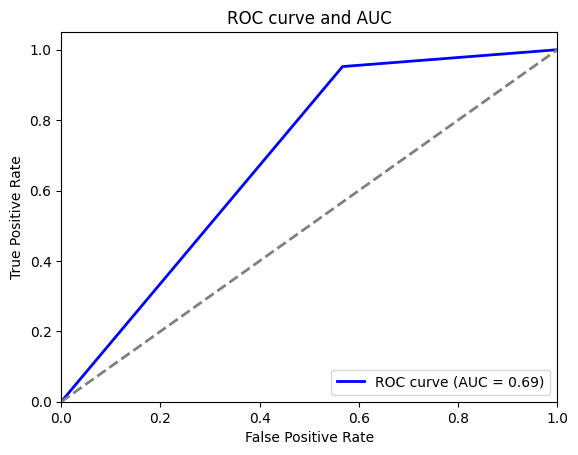

18/18 [==============================] - 0s 21ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.850877,0.830228,0.992574,0.904171,0.749299


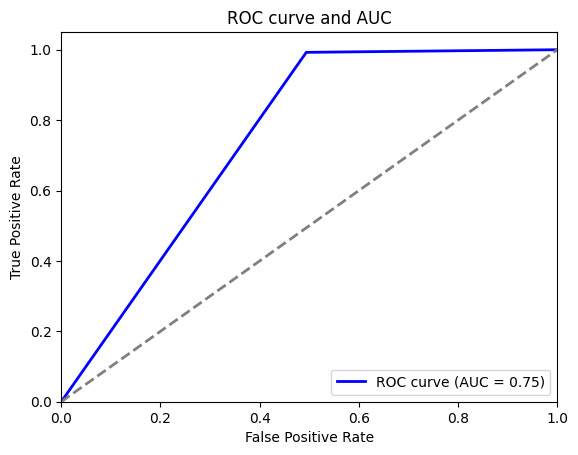

In [ ]:
# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)
encoder.trainable = False
encoder_output = encoder(encoder_input)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)

computeMetrics(y_test, y_pred)

# Evaluar el modelo
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)
computeMetrics(y_train, y_pred)


#### **1.2.3- Clasificador F: Modelo con autoencoder sin pesos congelados**

Epoch 1/10
36/36 [==============================] - 13s 56ms/step - loss: 0.0355
Epoch 2/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0142
Epoch 3/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0086
Epoch 4/10
36/36 [==============================] - 1s 35ms/step - loss: 0.0069
Epoch 5/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0062
Epoch 6/10
36/36 [==============================] - 1s 36ms/step - loss: 0.0058
Epoch 7/10
36/36 [==============================] - 1s 39ms/step - loss: 0.0055
Epoch 8/10
36/36 [==============================] - 1s 40ms/step - loss: 0.0054
Epoch 9/10
36/36 [==============================] - 1s 39ms/step - loss: 0.0052
Epoch 10/10
36/36 [==============================] - 1s 37ms/step - loss: 0.0051
Epoch 1/10
36/36 [==============================] - 2s 18ms/step - loss: 1.0069 - accuracy: 0.6912
Epoch 2/10
36/36 [==============================] - 1s 16ms/step - loss: 0.4906 - accuracy: 0.7702


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.812281,0.837093,0.888298,0.861935,0.776623


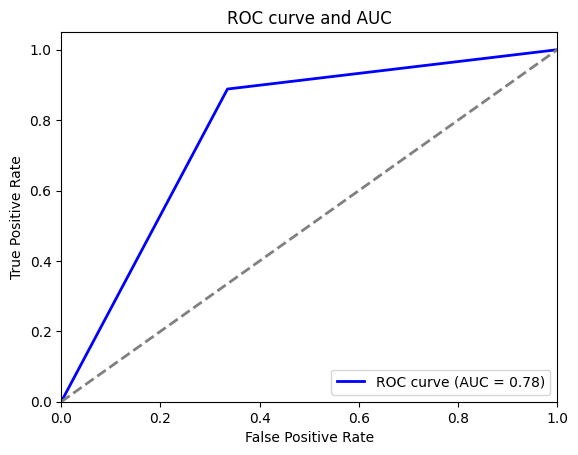

18/18 [==============================] - 0s 15ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.980702,0.982801,0.990099,0.986436,0.973965


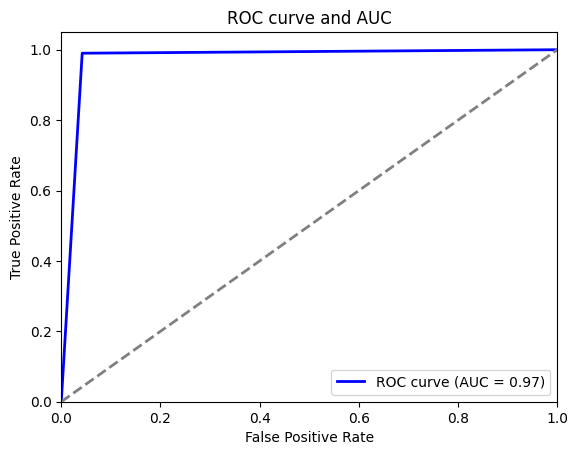

In [ ]:
# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)

computeMetrics(y_test, y_pred)
#En este código, se ha eliminado la línea encoder.trainable = False
#para que los pesos del encoder no estén congelados y se actualicen
#durante el entrenamiento del clasificador.

# Evaluar el modelo
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)
computeMetrics(y_train, y_pred)


## **2- Hipotesis 2**

Al agregar ruido a la entrada del autoencoder, es posible aprender representaciones más robustas que mejoran la clasificación y por ende, la representación latente.

Epoch 1/10
29/29 [==============================] - 7s 112ms/step - loss: 0.0388 - val_loss: 0.0307
Epoch 2/10
29/29 [==============================] - 2s 81ms/step - loss: 0.0209 - val_loss: 0.0136
Epoch 3/10
29/29 [==============================] - 3s 89ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 4/10
29/29 [==============================] - 2s 84ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 5/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 6/10
29/29 [==============================] - 2s 83ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 7/10
29/29 [==============================] - 2s 85ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 8/10
29/29 [==============================] - 2s 86ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
29/29 [==============================] - 3s 89ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 10/10
8/8 [==============================] - 0s 12ms/step


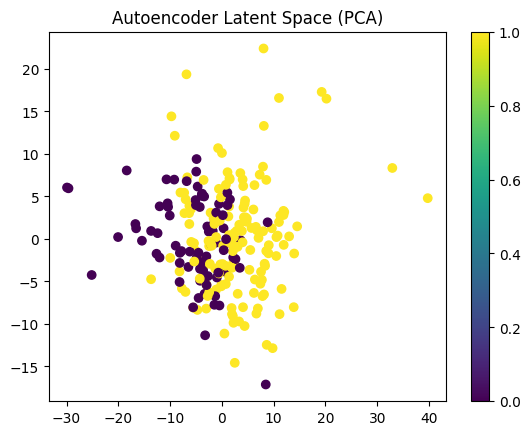

Epoch 1/10
57/57 [==============================] - 5s 36ms/step - loss: 4.8128 - accuracy: 0.6612
Epoch 2/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5710 - accuracy: 0.6919
Epoch 3/10
57/57 [==============================] - 2s 35ms/step - loss: 0.5622 - accuracy: 0.6919
Epoch 4/10
57/57 [==============================] - 2s 35ms/step - loss: 0.5517 - accuracy: 0.6919
Epoch 5/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5431 - accuracy: 0.6919
Epoch 6/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5321 - accuracy: 0.6985
Epoch 7/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5260 - accuracy: 0.7061
Epoch 8/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5887 - accuracy: 0.6678
Epoch 9/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5231 - accuracy: 0.6963
Epoch 10/10
8/8 [==============================] - 0s 22ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.719298,0.857143,0.684564,0.761194,0.734687


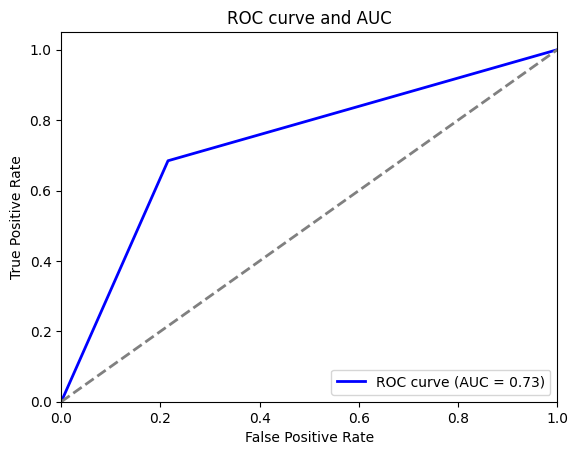

29/29 [==============================] - 1s 24ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.739035,0.856624,0.748019,0.798646,0.73344


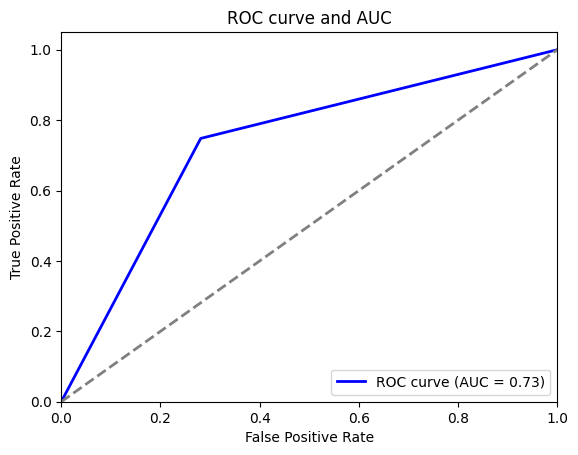

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ajustar las dimensiones de los datos de entrada
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

# Definir las capas del Autoencoder
input_img = Input(shape=(256, 256, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Construir el modelo del Autoencoder
autoencoder = Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

encoder = keras.Model(input_img, encoded)

# Obtener los vectores latentes
latent_autoencoder = encoder.predict(X_test)

# Aplanar los vectores latentes
latent_autoencoder_flat = latent_autoencoder.reshape(-1, np.prod(latent_autoencoder.shape[1:]))

# Aplicar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
latent_pca_autoencoder = pca.fit_transform(latent_autoencoder_flat)

# Visualizar los vectores latentes en un gráfico
plt.scatter(latent_pca_autoencoder[:, 0], latent_pca_autoencoder[:, 1], c=y_test, cmap='viridis')
plt.title("Autoencoder Latent Space (PCA)")
plt.colorbar()
plt.show()

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(decoded)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(input_img, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

computeMetrics(y_test, y_pred)


# Evaluar el modelo
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)

computeMetrics(y_train, y_pred)

### **2.1-Con ruido**

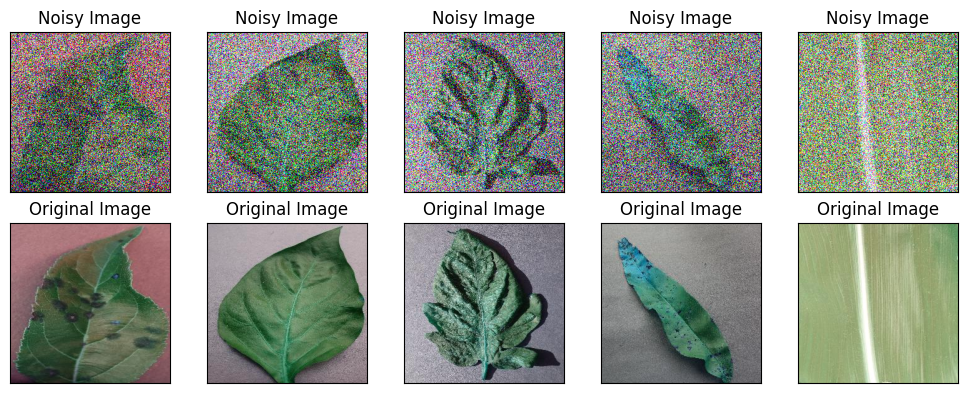

Epoch 1/10
29/29 [==============================] - 6s 116ms/step - loss: 0.0345 - val_loss: 0.0248
Epoch 2/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0175 - val_loss: 0.0141
Epoch 3/10
29/29 [==============================] - 3s 89ms/step - loss: 0.0125 - val_loss: 0.0121
Epoch 4/10
29/29 [==============================] - 3s 91ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 5/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 6/10
29/29 [==============================] - 2s 81ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 7/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 8/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 9/10
29/29 [==============================] - 3s 90ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 10/10
8/8 [==============================] - 0s 14ms/step


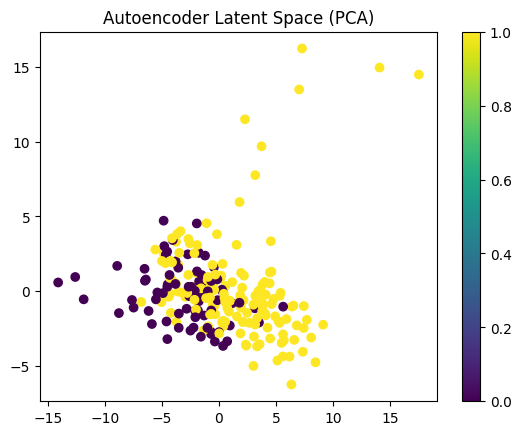

Epoch 1/10
57/57 [==============================] - 5s 37ms/step - loss: 5.1712 - accuracy: 0.6568
Epoch 2/10
57/57 [==============================] - 2s 35ms/step - loss: 0.5771 - accuracy: 0.6919
Epoch 3/10
57/57 [==============================] - 2s 36ms/step - loss: 0.5644 - accuracy: 0.6919
Epoch 4/10
57/57 [==============================] - 2s 36ms/step - loss: 0.5611 - accuracy: 0.6919
Epoch 5/10
57/57 [==============================] - 2s 35ms/step - loss: 0.5531 - accuracy: 0.6919
Epoch 6/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5452 - accuracy: 0.6919
Epoch 7/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5499 - accuracy: 0.6919
Epoch 8/10
57/57 [==============================] - 2s 35ms/step - loss: 0.5401 - accuracy: 0.6930
Epoch 9/10
57/57 [==============================] - 2s 34ms/step - loss: 0.5451 - accuracy: 0.6952
Epoch 10/10
8/8 [==============================] - 0s 28ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.666667,0.662222,1.0,0.796791,0.518987


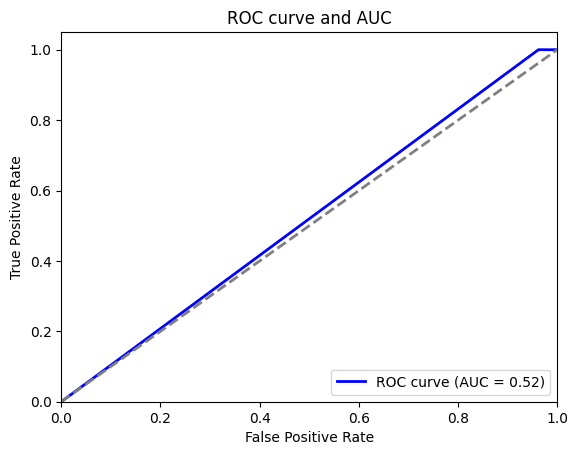

29/29 [==============================] - 1s 27ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.695175,0.694598,0.998415,0.819246,0.506325


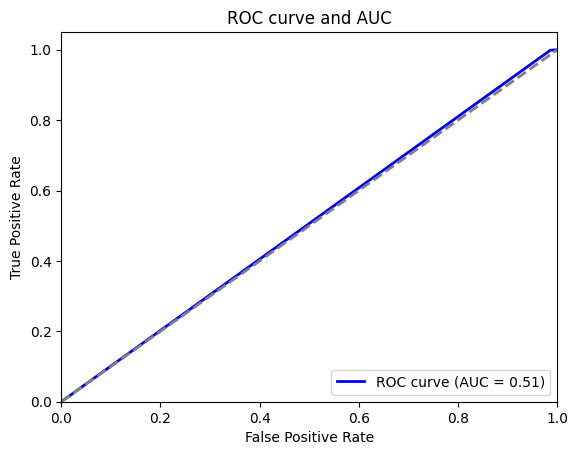

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


# Ajustar las dimensiones de los datos de entrada
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

# Generar imágenes con ruido
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Definir las capas del Autoencoder
input_img = Input(shape=(256, 256, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


# Mostrar una imagen con ruido y su correspondiente imagen original
plt.figure(figsize=(10, 4))
for i in range(5):
    # Imagen con ruido
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_noisy[i])
    plt.title('Noisy Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen original
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(X_train[i])
    plt.title('Original Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

# Construir el modelo del Autoencoder
autoencoder = Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el modelo con las imágenes ruidosas
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=32, validation_data=(X_test_noisy, X_test))

encoder = keras.Model(input_img, encoded)

# Obtener los vectores latentes de las imágenes sin ruido
latent_autoencoder = encoder.predict(X_test)

# Aplanar los vectores latentes
latent_autoencoder_flat = latent_autoencoder.reshape(-1, np.prod(latent_autoencoder.shape[1:]))

# Aplicar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
latent_pca_autoencoder = pca.fit_transform(latent_autoencoder_flat)

# Visualizar los vectores latentes en un gráfico
plt.scatter(latent_pca_autoencoder[:, 0], latent_pca_autoencoder[:, 1], c=y_test, cmap='viridis')
plt.title("Autoencoder Latent Space (PCA)")
plt.colorbar()
plt.show()

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(decoded)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(input_img, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

computeMetrics(y_test, y_pred)

# Evaluar el modelo
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)

computeMetrics(y_train, y_pred)
